In [1]:
import string

ALPHABET = 'abcdefghilmnopqrstuvz'
PUNCTUATION = string.punctuation + ' ' + '\n'

# create a secure key
key = 'scemo chi legge'
# remove useless characters
k = key.replace(' ', '')
k = ''.join(dict.fromkeys(k))

# get the original alphabet
alphabet = ALPHABET + PUNCTUATION
# create the new alphabet starting from the key values
new_alphabet = k
# append the other chars only if not already inserted
for x in alphabet:
    if x not in new_alphabet:
        new_alphabet += x

# get the encryption lut
encrypter = {k : v for k, v in zip(alphabet, new_alphabet)}

In [2]:
# Encrypt a message using Caesar substitution

msg = '''Il cifrario di Cesare prende il nome da Giulio Cesare, 
che lo utilizzava con l'intento di proteggere i suoi messaggi criptati. 
Grazie allo storico Svetonio sappiamo che Cesare utilizzava in genere 
una chiave di tre per il cifrario, come nel caso della corrispondenza 
militare inviata alle truppe comandate da Quinto Tullio Cicerone. 
Al tempo era sicuro perche gli avversari spesso non erano neanche in 
grado di leggere un testo in chiaro, men che mai uno cifrato; 
inoltre non esistevano metodi di crittanalisi in grado di rompere tale codice, 
per quanto banale.
Dalla scoperta dell'analisi delle frequenze, tutti i cifrari di questo tipo 
sono divenuti molto semplici da rompere; nessuno e adatto per comunicazioni 
sicure allo stato tecnologico attuale, ne lo e stato negli ultimi mille anni. 
Tuttavia, una forma di questo cifrario e ancora usata oggi per offuscare 
parti di un messaggio in modo da non renderle immediatamente comprensibili.'''

# encrypt the message
mapper = lambda x : encrypter[x]
msg_enc = ''.join(map(mapper, msg.lower()))

print('Messaggio Criptato\n====================\n')
print(msg_enc)

Messaggio Criptato

ga eghqsqgf mg eorsqo nqodmo ga dfbo ms iguagf eorsqo, 
elo af utgagzzsvs efd a'gdtodtf mg nqftoiioqo g rufg borrsiig eqgntstg. 
iqszgo saaf rtfqgef rvotfdgf rsnngsbf elo eorsqo utgagzzsvs gd iodoqo 
uds elgsvo mg tqo noq ga eghqsqgf, efbo doa esrf moaas efqqgrnfdmodzs 
bgagtsqo gdvgsts saao tqunno efbsdmsto ms pugdtf tuaagf egeoqfdo. 
sa tobnf oqs rgeuqf noqelo iag svvoqrsqg rnorrf dfd oqsdf dosdelo gd 
iqsmf mg aoiioqo ud tortf gd elgsqf, bod elo bsg udf eghqstf; 
gdfatqo dfd orgrtovsdf botfmg mg eqgttsdsagrg gd iqsmf mg qfbnoqo tsao efmgeo, 
noq pusdtf csdsao.
msaas refnoqts moaa'sdsagrg moaao hqopuodzo, tuttg g eghqsqg mg puortf tgnf 
rfdf mgvodutg bfatf robnageg ms qfbnoqo; dorrudf o smsttf noq efbudgeszgfdg 
rgeuqo saaf rtstf toedfafigef sttusao, do af o rtstf doiag uatgbg bgaao sddg. 
tuttsvgs, uds hfqbs mg puortf eghqsqgf o sdefqs ursts fiig noq fhhuresqo 
nsqtg mg ud borrsiigf gd bfmf ms dfd qodmoqao gbbomgstsbodto efbnqodrgcgag.


Text(0.5, 1.0, 'Italian Language Occurrencies')

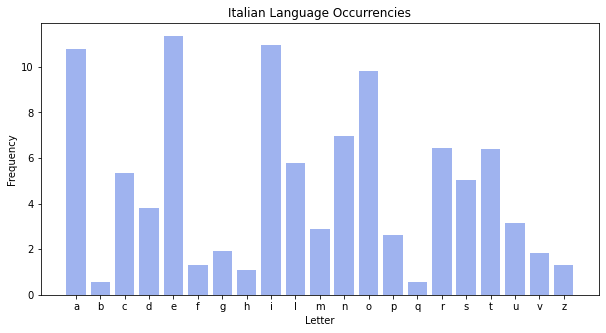

In [9]:
# get the letter frequency in the italian language

import pylab as plt

italian_freq = {'a': 10.96, 'b': 1.32, 'c': 5.05, 'd': 3.79,
                'e': 11.35, 'f': 1.10, 'g': 1.82, 'h': 1.30,
                'i': 10.78, 
                #'j': 0.02, 'k': 0.02, 
                'l': 6.39, 
                'm':  2.63, 'n': 6.96, 'o': 9.81, 'p': 2.89, 
                'q':  0.57, 'r': 6.44, 's': 5.35, 't': 5.76, 
                'u':  3.15, 'v': 1.90, #'w': 0.00, 'x': 0.08,
                #'y':  0.01, 
                'z': 0.57,
               }
if 1:
    italian_freq = {'a': 10.78, 'b': 0.56, 'c': 5.35, 'd': 3.79,
                    'e': 11.35, 'f': 1.32, 'g': 1.90, 'h': 1.10,
                    'i': 10.96, 'l': 5.76, 'm': 2.89, 'n': 6.96, 
                    'o':  9.81, 'p': 2.63, 'q': 0.58, 'r': 6.44, 
                    's':  5.05, 't': 6.39, 'u': 3.15, 'v': 1.82, 
                    'z':  1.30,
                   }

letter, perc = zip(*italian_freq.items())

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(range(0, len(italian_freq)), perc, color='royalblue', alpha=.5)
_ = ax.set_xticks(range(0, len(italian_freq)))
_ = ax.set_xticklabels(letter)
ax.set_xlabel('Letter')
ax.set_ylabel('Frequency')
ax.set_title('Italian Language Occurrencies')

In [10]:
# evaluate the occurrencies of the encrypted msg

from collections import Counter

# compute the occurrencies
occ = Counter(msg_enc)
num_char = 100./len(msg_enc)        
        
# filter the punctuations
occ = [(k, v*num_char) for k, v in occ.items() if k in ALPHABET]
occ = sorted(occ, key=lambda x: x[1])[::-1]

Text(0, 0.5, 'Frequency')

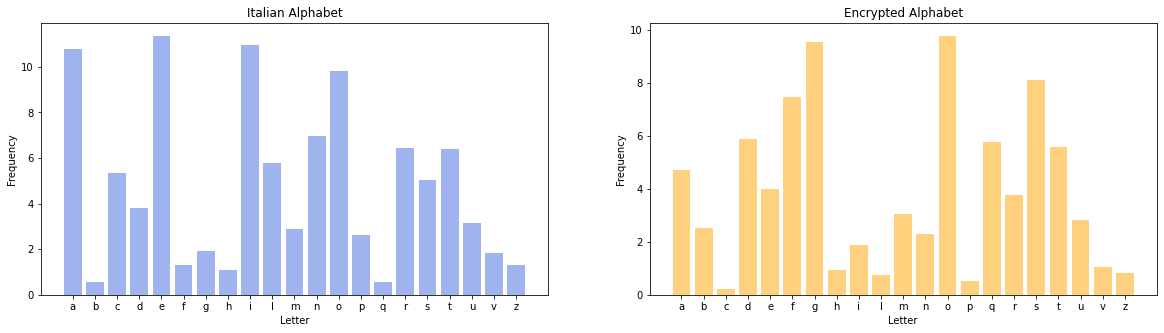

In [11]:
import numpy as np
letter, perc = zip(*italian_freq.items())

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax1.bar(range(0, len(italian_freq)), perc, color='royalblue', alpha=0.5)
_ = ax1.set_xticks(range(0, len(italian_freq)))
_ = ax1.set_xticklabels(letter)
ax1.set_title('Italian Alphabet')
ax1.set_xlabel('Letter')
ax1.set_ylabel('Frequency')

letter, perc = zip(*sorted(occ, key=lambda x : x[0]))
ax2.bar(range(0, len(occ)), perc, color='orange', alpha=.5)
_ = ax2.set_xticks(range(0, len(occ)))
_ = ax2.set_xticklabels(letter)
ax2.set_title('Encrypted Alphabet')
ax2.set_xlabel('Letter')
ax2.set_ylabel('Frequency')

In [12]:
# remap the letter into the decrypter

ita = [(k, v) for k, v in italian_freq.items()]
ita = sorted(ita, key=lambda x: x[1])[::-1]

decrypter = {y[0] : x[0] for x, y in zip(ita, occ)}
decrypter.update({k : k for k in PUNCTUATION})

In [13]:
# decrypt the message remapping

mapper = lambda x : decrypter[x]
msg_dec = ''.join(map(mapper, msg_enc))

print('Messaggio Criptato\n====================\n')
print(msg_enc)
print('')

print('Messaggio DE-Criptato\n====================\n')
print(msg_dec)

Messaggio Criptato

ga eghqsqgf mg eorsqo nqodmo ga dfbo ms iguagf eorsqo, 
elo af utgagzzsvs efd a'gdtodtf mg nqftoiioqo g rufg borrsiig eqgntstg. 
iqszgo saaf rtfqgef rvotfdgf rsnngsbf elo eorsqo utgagzzsvs gd iodoqo 
uds elgsvo mg tqo noq ga eghqsqgf, efbo doa esrf moaas efqqgrnfdmodzs 
bgagtsqo gdvgsts saao tqunno efbsdmsto ms pugdtf tuaagf egeoqfdo. 
sa tobnf oqs rgeuqf noqelo iag svvoqrsqg rnorrf dfd oqsdf dosdelo gd 
iqsmf mg aoiioqo ud tortf gd elgsqf, bod elo bsg udf eghqstf; 
gdfatqo dfd orgrtovsdf botfmg mg eqgttsdsagrg gd iqsmf mg qfbnoqo tsao efmgeo, 
noq pusdtf csdsao.
msaas refnoqts moaa'sdsagrg moaao hqopuodzo, tuttg g eghqsqg mg puortf tgnf 
rfdf mgvodutg bfatf robnageg ms qfbnoqo; dorrudf o smsttf noq efbudgeszgfdg 
rgeuqo saaf rtstf toedfafigef sttusao, do af o rtstf doiag uatgbg bgaao sddg. 
tuttsvgs, uds hfqbs mg puortf eghqsqgf o sdefqs ursts fiig noq fhhuresqo 
nsqtg mg ud borrsiigf gd bfmf ms dfd qodmoqao gbbomgstsbodto efbnqodrgcgag.

Messaggio DE-Criptato

il 

In [380]:
# try to get the encryption key from the alphabet order
dec = [(k, v) for k, v in decrypter.items() if k not in PUNCTUATION]
sorted(dec, key=lambda x: x[1])

[('s', 'a'),
 ('c', 'b'),
 ('e', 'c'),
 ('m', 'd'),
 ('o', 'e'),
 ('h', 'f'),
 ('i', 'g'),
 ('l', 'h'),
 ('g', 'i'),
 ('a', 'l'),
 ('b', 'm'),
 ('d', 'n'),
 ('f', 'o'),
 ('n', 'p'),
 ('p', 'q'),
 ('q', 'r'),
 ('r', 's'),
 ('t', 't'),
 ('u', 'u'),
 ('v', 'v'),
 ('z', 'z')]